# Projet : Détection de Contours sur une Image avec Filtres Sobel, Canny et Gaussien

#### Auteur: Fidèle Ledoux
##### Computer Vision _ IAS_M2_DS2

### Introduction
Ce projet a pour objectif de mettre en œuvre trois algorithmes classiques de détection des contours dans une image : Sobel, Canny et Gaussien. Ces méthodes sont largement utilisées en vision par ordinateur pour extraire les contours des objets dans une image, ce qui est essentiel pour des tâches comme la segmentation, la reconnaissance d'objets et l'analyse d'images.

Filtre de Sobel : Utilise des gradients pour détecter les changements brusques de luminosité, identifiant ainsi les contours.

Filtre Gaussien : Applique un flou pour réduire le bruit avant l'étape de détection des contours, améliorant la précision.

Algorithme de Canny : Combine plusieurs étapes (flou gaussien, calcul des gradients, suppression des non-maxima et seuillage) pour une détection plus précise et robuste.

Le projet est implémenté en Python avec les bibliothèques OpenCV et Matplotlib pour le traitement et la visualisation des images.



## Partie 1 : Algorithme de Canny
### 1.1 Introduction
L'algorithme de Canny est une méthode robuste pour détecter les contours dans une image. Il suit plusieurs étapes :

1.Réduction du bruit via un flou gaussien.

2.Calcul des gradients (Sobel pour les dérivées horizontales et verticales).

3.Suppression des non-maxima pour affiner les contours.

4.Seuillage double pour distinguer les contours forts et faibles.

### 1.2 Implémentation du code

Image chargée : Laety.jpeg


<Figure size 640x480 with 0 Axes>

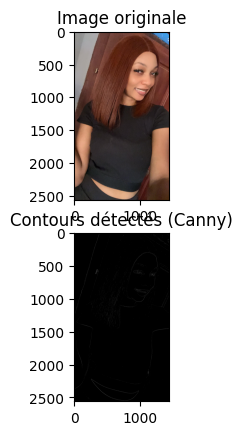

In [7]:
#Importation des bibliothèques nécessaires
import sys
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def Canny_detector(img, weak_th=None, strong_th=None):
    # Conversion en niveaux de gris
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Réduction du bruit avec un flou gaussien
    img = cv2.GaussianBlur(img, (5, 5), 1.4)
    
    # Calcul des gradients avec Sobel
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
    
    # Conversion des gradients en magnitude et angle
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    # Seuillage automatique si non spécifié
    mag_max = np.max(mag)
    if not weak_th: weak_th = mag_max * 0.1
    if not strong_th: strong_th = mag_max * 0.5
    
    # Suppression des non-maxima
    height, width = img.shape
    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
            
            # Sélection des voisins selon la direction du gradient
            if grad_ang <= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif grad_ang > 22.5 and grad_ang <= (22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif grad_ang > (22.5 + 45) and grad_ang <= (22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif grad_ang > (22.5 + 90) and grad_ang <= (22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
            elif grad_ang > (22.5 + 135) and grad_ang <= (22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            
            # Suppression des pixels non maximaux
            if width > neighb_1_x >= 0 and height > neighb_1_y >= 0:
                if mag[i_y, i_x] < mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x] = 0
                    continue
            if width > neighb_2_x >= 0 and height > neighb_2_y >= 0:
                if mag[i_y, i_x] < mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x] = 0
    
    # Seuillage double
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)
    ids = np.zeros_like(img)
    
    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y, i_x]
            if grad_mag < weak_th:
                mag[i_y, i_x] = 0
            elif strong_th > grad_mag >= weak_th:
                ids[i_y, i_x] = 1
            else:
                ids[i_y, i_x] = 2
    
    return mag

# Chargement de l'image
frame = cv2.imread('Laety.jpeg')
print("Image chargée : Laety.jpeg")

# Application de l'algorithme de Canny
canny_img = Canny_detector(frame)

# Affichage des résultats
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plots[0].set_title("Image originale")
plots[1].imshow(canny_img, cmap='gray')
plots[1].set_title("Contours détectés (Canny)")
plt.show()

### 1.3 Résultats et commentaires
Image originale : L'image d'entrée est affichée en couleur.

Image des contours (Canny) : Les contours détectés sont affichés en niveaux de gris. L'algorithme de Canny a bien identifié les bords principaux de l'image, comme les contours du visage et des cheveux. Les zones floues ou uniformes (comme le fond) sont ignorées, ce qui montre l'efficacité du seuillage double.

## Partie 2 : Algorithme de Sobel

### 2.1 Introduction
L'algorithme de Sobel est une méthode plus simple pour détecter les contours en calculant les gradients horizontaux et verticaux de l'image. Il est moins précis que Canny mais plus rapide.

### 2.2 Implémentation du code

Image chargée : Laety.jpeg

 Application du flou gaussien...


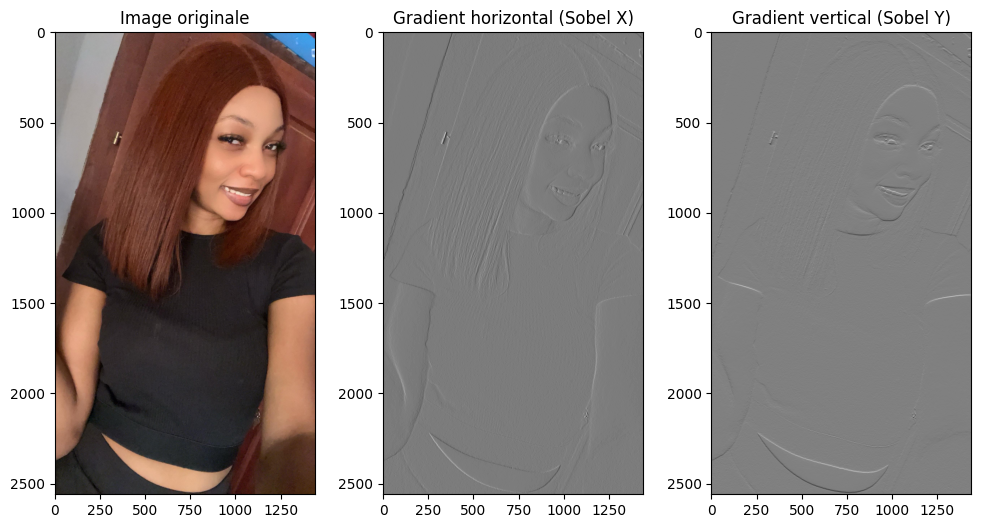

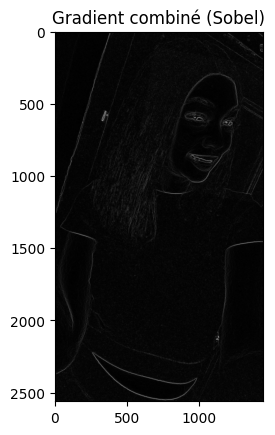

In [3]:
# Chargement de l'image
img = cv2.imread('Laety.jpeg')
print("Image chargée : Laety.jpeg")

# Conversion en niveaux de gris et application d'un flou gaussien
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
print("\n Application du flou gaussien...")

# Calcul des gradients avec Sobel
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Combinaison des gradients
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = np.uint8(sobel_combined / np.max(sobel_combined) * 255)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image originale")

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Gradient horizontal (Sobel X)")

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Gradient vertical (Sobel Y)")
plt.show()

plt.figure()
plt.imshow(sobel_combined, cmap='gray')
plt.title("Gradient combiné (Sobel)")
plt.show()

### 2.3 Résultats et commentaires
Image originale : Affichée en couleur pour référence.

Gradient horizontal (Sobel X) : Met en évidence les contours verticaux (ex : côtés du visage).

Gradient vertical (Sobel Y) : Met en évidence les contours horizontaux (ex : sourcils, lèvres).

Gradient combiné : Combine les deux gradients pour une détection complète des contours. Comparé à Canny, Sobel est moins précis mais plus rapide.

## Partie 3 : Filtre Gaussien

### 3.1 Principe du filtre Gaussien
Le filtre Gaussien est utilisé pour réduire le bruit dans l'image avant d'appliquer d'autres traitements (comme la détection de contours). Il applique un flou en convoluant l'image avec un noyau Gaussien.

### 3.2 Implémentation du code

Image chargée : Laety.jpeg


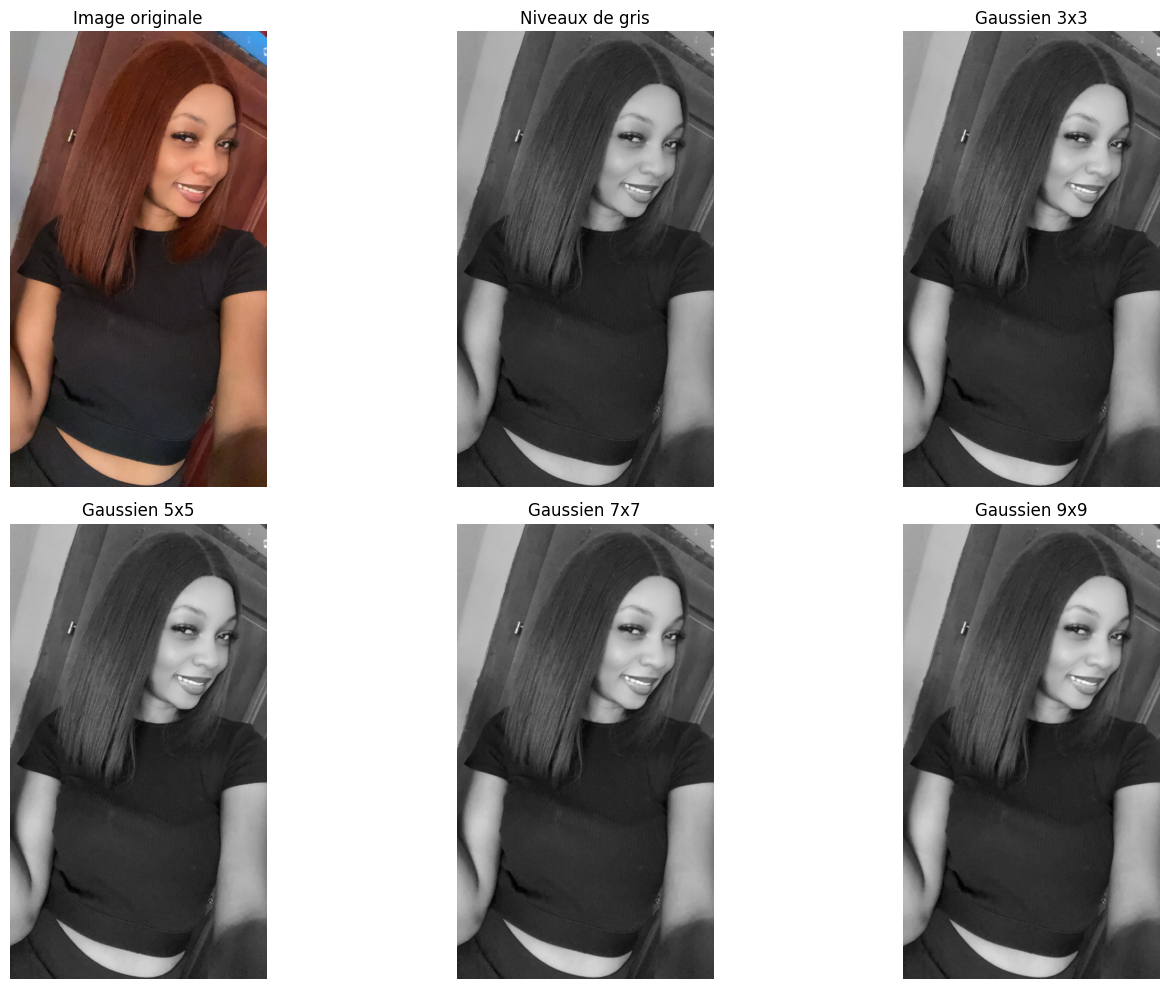

In [5]:
# Chargement de l'image
img = cv2.imread('Laety.jpeg')
print("Image chargée : Laety.jpeg")

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Application du filtre Gaussien avec différents noyaux
blurred_3x3 = cv2.GaussianBlur(gray, (3, 3), 0)
blurred_5x5 = cv2.GaussianBlur(gray, (5, 5), 0)
blurred_7x7 = cv2.GaussianBlur(gray, (7, 7), 0)
blurred_9x9 = cv2.GaussianBlur(gray, (9, 9), 0)

# Affichage des résultats
plt.figure(figsize=(15, 10))

# Image originale
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')

# Image en niveaux de gris
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Niveaux de gris")
plt.axis('off')

# Filtre Gaussien 3x3
plt.subplot(2, 3, 3)
plt.imshow(blurred_3x3, cmap='gray')
plt.title("Gaussien 3x3")
plt.axis('off')

# Filtre Gaussien 5x5
plt.subplot(2, 3, 4)
plt.imshow(blurred_5x5, cmap='gray')
plt.title("Gaussien 5x5")
plt.axis('off')

# Filtre Gaussien 7x7
plt.subplot(2, 3, 5)
plt.imshow(blurred_7x7, cmap='gray')
plt.title("Gaussien 7x7")
plt.axis('off')

# Filtre Gaussien 9x9
plt.subplot(2, 3, 6)
plt.imshow(blurred_9x9, cmap='gray')
plt.title("Gaussien 9x9")
plt.axis('off')

plt.tight_layout()
plt.show()

### Interprétation des résultats
Image originale : L'image de départ en couleur, servant de référence.

Niveaux de gris : Version monochrome de l'image, nécessaire pour le traitement ultérieur.

Gaussien 3x3 :

Légère réduction du bruit

Préservation quasi-totale des détails fins

Idéal pour les images déjà peu bruitées

Gaussien 5x5 :

Réduction plus marquée du bruit

Légère perte des détails les plus fins

Bon compromis pour la plupart des applications

Gaussien 7x7 :

Forte atténuation du bruit

Perte notable des détails

Utile pour les images très bruitées

Gaussien 9x9 :

Flou très prononcé

Forte perte des détails

Réserve aux cas extrêmes de bruit

#### Application pratique
Le filtre Gaussien est particulièrement utile :

Comme prétraitement avant la détection de contours (Sobel/Canny)

Pour éliminer le bruit tout en préservant les contours globaux

Pour simuler des effets de flou artistique

### Variante avec image couleur

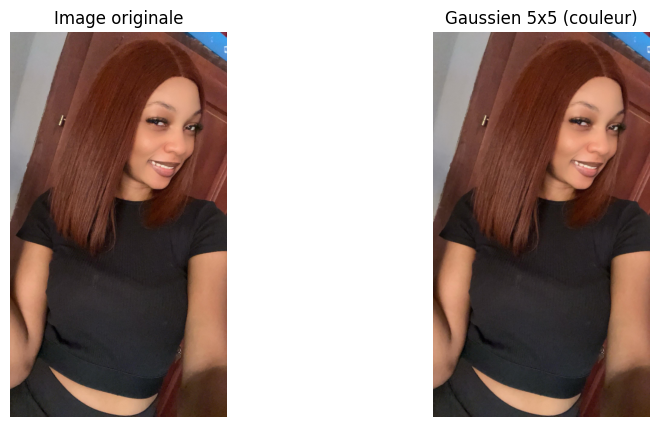

In [6]:
# Application du filtre Gaussien sur l'image couleur
blurred_color = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_color, cv2.COLOR_BGR2RGB))
plt.title("Gaussien 5x5 (couleur)")
plt.axis('off')

plt.show()

Cette version préserve les canaux de couleur tout en appliquant le flou. Le résultat est plus naturel mais moins efficace pour le traitement d'image que la version en niveaux de gris

## Partie 4 : Comparaison des méthodes

### 4.1 Avantages et inconvénients
Sobel : Simple et rapide, mais sensible au bruit.

Gaussien : Réduit efficacement le bruit, mais perd des détails fins.

Canny : Plus précis et robuste, mais plus complexe à implémenter.

### 4.2 Résultats visuels
Les images ci-dessous montrent les résultats des trois méthodes :

1.Image originale : Image source en niveaux de gris.

2.Sobel : Détection des contours avec des gradients.

3.Gaussien + Canny : Réduction du bruit suivie d'une détection précise.

## Conclusion Générale

Ce projet a permis d'implémenter et de comparer trois méthodes de détection de contours : Sobel, Gaussien et Canny. Chaque algorithme a ses forces et ses faiblesses :

Le filtre de Sobel est utile pour une détection rapide mais moins précise.

Le filtre Gaussien améliore la qualité des images bruitées avant traitement.

L'algorithme de Canny offre les meilleurs résultats en combinant plusieurs étapes de traitement.

En pratique, le choix de la méthode dépend des besoins spécifiques (vitesse, précision, résistance au bruit). Une approche courante consiste à combiner le flou Gaussien avec Canny pour une détection optimale.

##### Améliorations possibles
1.Optimisation des paramètres : Ajuster les seuils de Canny ou la taille du noyau Gaussien.

2.Fusion des méthodes : Combiner Sobel et Canny pour des résultats plus robustes.

3.Application à des vidéos : Étendre le traitement à des flux vidéo en temps réel.

Ce projet illustre l'importance du prétraitement (comme le flou Gaussien) et du choix des algorithmes pour des tâches de vision par ordinateur.